Mount Google drive to Read Files

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/My Drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Method to calcualte spearman's Correlation Coefficient

In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])


### Import all necessary libraries

In [125]:
import numpy as np
import pandas as pd
from string import punctuation
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools 
import io

from tensorflow.python.keras import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Embedding, Flatten
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras import optimizers

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read the CSV from Drive - clean the data i.e remove columns to convert into numpy array

In [0]:
df_cap = pd.read_csv('test.csv')
df_cap.drop(df_cap.columns[0], axis = 1, inplace = True)

### One-hot encode the data - padding by unique word count

In [0]:
counts = Counter()
for i, cap in enumerate(df_cap['cleaned_sentence']):
    counts.update(cap.split())

In [204]:
len_token = len(counts)
tokenizer = Tokenizer(num_words=len_token)
print(len_token)

4346


In [0]:
tokenizer.fit_on_texts(list(df_cap.cleaned_sentence.values))
one_hot_res = tokenizer.texts_to_matrix(list(df_cap.cleaned_sentence.values),mode='binary')

### Extract Compound - Sentiment data of each captions and append it to the one-hot encoded array

In [0]:
one_hot_list = one_hot_res.tolist()
for ind, cap in df_cap.iterrows():
  comp = cap['compound']
  comp = comp * comp
  one_hot_list[ind].extend([comp])   

In [0]:
one_hot_senti = np.array([np.array(xi) for xi in one_hot_list])

### MLP - One hot encoded and Sentiment Data

In [0]:
X = one_hot_senti
Y = labels[['short-term_memorability', 'long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [236]:
model = Sequential()
# best - 50,27.2
model.add(layers.Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(27,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2,activation='relu'))

# compile the model 
model.compile(optimizer='adamax',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train, Y_train, epochs=50)

loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)


Epoch 1/50
150/150 [==============================] - 0s 3ms/step - loss: 0.2433 - accuracy: 0.3996
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.7004
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.7025
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.7031
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7033
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.7035
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.0259 - accuracy: 0.7035
Epoch 8/50
150/150 [==============================] - 1s 4ms/step - loss: 0.0232 - accuracy: 0.7035
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.7038
Epoch 10/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.7035

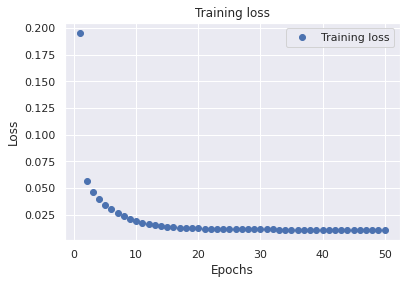

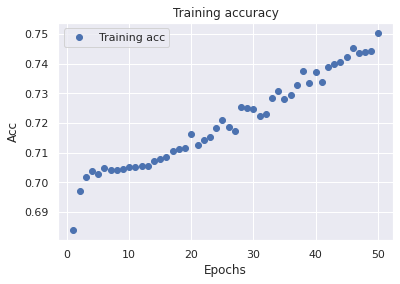

In [200]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

The Spearman's correlation coefficient is: 0.456
The Spearman's correlation coefficient is: 0.165

In [237]:
predictions = model.predict(X_test)
Get_score(predictions, Y_test) 

The Spearman's correlation coefficient is: 0.456
The Spearman's correlation coefficient is: 0.165


Mean Squared Error - 0.024340460666616062

In [240]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test[:, 1:], predictions[: , 1:]) 

0.024340460666616062

### One hot encoded and sentiment - Run The same with Random Forest Regressor

In [0]:
X = one_hot_senti
#Y = labels[['short-term_memorability']].values
Y = labels[['short-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

The Spearman's correlation coefficient is: 0.440
0.006156058503671583

In [219]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=2000, max_features= 5, min_samples_leaf = 4, min_samples_split= 4)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)
mean_squared_error(Y_test, y_pred) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.440


0.006156058503671583

### prepare TF-IDF and Sentiment Analysis array

In [0]:
cap_list = (df_cap[['cleaned_sentence']].values).tolist()

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=1, stop_words='english')
X_TF=tfidf.fit_transform(df_cap['cleaned_sentence'])
X_tfarrseq=X_TF.toarray()
X_tfarrseq.shape

(6000, 4260)

In [0]:
senti_array = df_cap[['compound']].values
tf_sent = np.concatenate((X_tfarrseq, senti_array), axis = 1)

### MLP with TF-IDF and sentiment



In [0]:
X = tf_sent
Y = labels[['short-term_memorability', 'long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [245]:
model = Sequential()
# best - 50,27.2
model.add(layers.Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(32,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2,activation='relu'))

# compile the model 
model.compile(optimizer='adamax',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train, Y_train, epochs=50)

loss = history.history['loss']
epochs = range(1,len(loss)+1)


Epoch 1/50
150/150 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.5225
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.7035
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.7035
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.7035
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.7035
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.7035
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.7035
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.7035
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.7035
Epoch 10/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.7035

The Spearman's correlation coefficient is: 0.454
The Spearman's correlation coefficient is: 0.229

In [246]:
predictions = model.predict(X_test)
Get_score(predictions, Y_test) 


The Spearman's correlation coefficient is: 0.454
The Spearman's correlation coefficient is: 0.229


Mean Squared Error : 0.02116023831387497

In [248]:
mean_squared_error(Y_test[:, 1:], predictions[:, 1:]) 

0.02116023831387497

### Long-term Random Forest Regressor , TFIDF and sentiment analyis

In [0]:
X = tf_sent
#Y = labels[['short-term_memorability']].values
Y = labels[['long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [230]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=2000, max_features= 5, min_samples_leaf = 3, min_samples_split= 5)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
Get_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Spearman's correlation coefficient is: 0.185


Mean Squared error: 0.021833748627873854

In [231]:
mean_squared_error(Y_test, y_pred) 

0.021833748627873854

### Word Embedding with GloVe - MLP

In [17]:
df_cap['cleaned_sentence'].apply(lambda x: len(x.split(' '))).sum()

39311

In [0]:
flat_list = [item for sublist in cap_list for item in sublist]
flat_list

Take the unique word cound and pad every caption

In [33]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
vocab_size = 50
encoded_docs = [one_hot(d, 4346) for d in flat_list]
print(encoded_docs)

[[1765, 208, 3402, 4027], [3838, 3965, 2640, 1979, 3439, 3348], [3744, 2984], [3173, 3050, 2284, 3707], [3077, 2399, 1439, 1889, 3348], [2453, 4061, 3109, 1286], [2963, 1008, 2327, 2963, 3985], [2798, 3024, 3246, 3804, 2991, 1504], [4014, 1492, 3583, 2848], [3697, 1917, 3708, 2399, 2725], [3084, 447], [58, 734, 3082, 2471, 3733, 1610], [1813, 2909, 3313, 2703, 3618], [208, 2250, 1495, 1596, 648], [3294, 208, 4072, 4034, 3922, 627, 1919, 208, 3591], [2311, 753, 3728, 4337, 3683], [2032, 3772, 1611], [3144, 2748, 2460], [2685, 991, 3591, 1150], [1247, 417, 2514, 1081, 2135, 1418, 1247, 4028], [3077, 2399, 2223, 2693], [3697, 3077, 2399, 3985, 1102], [4093, 3772, 3149, 925, 1235, 83, 2273, 1012, 2668, 3348], [3858, 3787, 2125], [153, 3024, 939, 637, 4135, 1245], [1981, 4043, 498, 591], [3707, 1653], [3697, 2664, 633, 163, 99], [2909, 1662, 633, 2462], [2395, 3655, 2748], [3090, 3109, 208, 1570, 153, 3642, 6, 648], [4046, 208, 2334, 3083], [2994, 86, 4046, 1630, 344, 3191, 3246, 2273, 1656

In [249]:
t = Tokenizer()
t.fit_on_texts(flat_list)
vocab_size = len(t.word_index) + 1
vocab_size

4347

In [250]:
encoded_docs = t.texts_to_sequences(flat_list)
print(encoded_docs)

[[689, 1, 194, 317], [1988, 67, 247, 166, 69, 17], [116, 263], [690, 750, 2649, 150], [8, 108, 499, 221, 17], [640, 190, 3, 419], [70, 691, 47, 70, 24], [1586, 76, 16, 362, 1989, 1164], [2650, 1990, 176, 278], [9, 7, 751, 108, 264], [928, 2651], [13, 420, 28, 442, 1328, 109], [54, 40, 1587, 1588, 1043], [1, 1991, 44, 51, 98], [35, 1, 279, 1044, 213, 363, 641, 1, 598], [180, 2652, 1992, 1993, 42], [19, 10, 62], [160, 50, 34], [48, 2653, 598, 21], [752, 23, 1589, 1590, 1329, 1591, 752, 475], [8, 108, 59, 642], [9, 8, 108, 24, 929], [692, 10, 1045, 171, 2654, 1165, 15, 5, 443, 17], [56, 1592, 444], [29, 76, 84, 110, 233, 137], [1994, 12, 643, 500], [150, 1166], [68, 222, 41, 304, 102], [40, 181, 41, 644], [824, 2655, 50], [2, 3, 1, 99, 334, 27, 86, 98], [138, 1, 599, 1167], [63, 501, 138, 20, 1330, 1331, 16, 15, 930, 255, 3, 1332, 1593, 13, 114], [70, 351, 2656, 1995, 1995, 1594, 1996], [753, 30, 280, 72, 154], [502, 139], [825, 21, 1595, 503, 421, 4, 5, 364, 21, 825, 553, 79, 1046], [256

In [251]:
max_length = 50
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 689    1  194 ...    0    0    0]
 [1988   67  247 ...    0    0    0]
 [ 116  263    0 ...    0    0    0]
 ...
 [ 185   10 2462 ...    0    0    0]
 [  33   79    1 ...    0    0    0]
 [  33   54  223 ...    0    0    0]]


Install the glove text file which has the similary scores for each word

In [57]:
!apt install unzip
!unzip './glove6b100dtxt.zip' -d ""

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Archive:  ./glove6b100dtxt.zip
  inflating: glove.6B.100d.txt       


In [252]:

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [0]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

prepare the embedding layer for MLP

In [0]:
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=50, trainable=False)

In [0]:
X = padded_docs
#Y = labels[['short-term_memorability']].values
Y = labels[['short-term_memorability', 'long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

### MLP - word embedding and sentiment analysisi

In [258]:
model = Sequential()
model.add(e)
model.add(Flatten())
model.add(layers.Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(27,activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(2,activation='relu'))

model.compile(optimizer='adamax',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train, Y_train, epochs=50)

loss = history.history['loss']

epochs = range(1,len(loss)+1)


Epoch 1/50
150/150 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.5967
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0857 - accuracy: 0.6623
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.6842
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.6981
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.7110
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.7154
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.7225
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.7262
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.7252
Epoch 10/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.7323

The Spearman's correlation coefficient is: 0.378
The Spearman's correlation coefficient is: 0.107

In [259]:
predictions = model.predict(X_test)
Get_score(predictions, Y_test) 

The Spearman's correlation coefficient is: 0.378
The Spearman's correlation coefficient is: 0.107


In [0]:
mean_squared_error(Y_test[:, :-1], y_pred[: , :-1])
#mean_squared_error(Y_test[:, 1:], y_pred[: , 1:]) 

In [0]:
label_path = './Assignment/Dev-set/Ground-truth/'
labels=pd.read_csv(label_path+'ground-truth.csv')

In [0]:
X = padded_docs
#Y = labels[['short-term_memorability']].values
Y = labels[['short-term_memorability', 'long-term_memorability']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

## Test Data - Get the Final Predictions

Load the file 

In [0]:
test_df_cap = pd.read_csv('train_test.csv')
#test_df_cap.drop(test_df_cap.columns[0], axis = 1, inplace = True)

In [141]:
test_df_cap.head()

,video_name,cleaned_sentence,compound
0,video3.webm,blonde woman massage tilt,0.0000
1,video4.webm,roulette table spin ball closeup shot,0.0000
2,video6.webm,khr gangster,0.0000
3,video8.webm,medical helicopter hovers airport,0.0000
4,video10.webm,couple relax picnic crane shot,0.4404


### Short-term final predictions with One-hot encoded and sentiment analysis

In [0]:
counts = Counter()
for i, cap in enumerate(test_df_cap['cleaned_sentence']):
    counts.update(cap.split())

In [143]:
len_token = len(counts)
tokenizer = Tokenizer(num_words=len_token)
print(len_token)

4893


In [0]:
tokenizer.fit_on_texts(list(test_df_cap.cleaned_sentence.values))
one_hot_res_Test = tokenizer.texts_to_matrix(list(test_df_cap.cleaned_sentence.values),mode='binary')

In [0]:
type(one_hot_list_test)

In [0]:
one_hot_list_test = one_hot_res_Test.tolist()
for ind, cap in test_df_cap.iterrows():
  comp = cap['compound']
  comp = comp * comp
  one_hot_list_test[ind].extend([comp])   

In [0]:
one_hot_senti_test = np.array([np.array(xi) for xi in one_hot_list_test])

In [151]:
one_hot_senti_test.shape

(8000, 4894)

Split the data to generate the final predictions

In [0]:
#X = one_hot_senti
#Y = labels[['short-term_memorability', 'long-term_memorability']].values
X_train = one_hot_senti_test[0:6000 , :]
X_test = one_hot_senti_test[6000: 8001, :] 
Y_train = labels[['short-term_memorability', 'long-term_memorability']].values
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [163]:
print(X_train.shape, X_test.shape, Y_train.shape)


(6000, 4894) (2000, 4894) (6000, 2)


### MLP - for short term scores, One hot encoded and sentiment analysis

Multi-layer Perceptron gave the best results for short-term memorability

In [164]:
model = Sequential()
# best - 50,27.2
model.add(layers.Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(27,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2,activation='relu'))

# compile the model 
model.compile(optimizer='adamax',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train, Y_train, epochs=50)

loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)


Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: 0.2008 - accuracy: 0.6897
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.7010
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.7048
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.7048
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.7052
Epoch 6/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.7048
Epoch 7/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0202 - accuracy: 0.7053
Epoch 8/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0183 - accuracy: 0.7048
Epoch 9/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0168 - accuracy: 0.7050
Epoch 10/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0156 - accuracy: 0.7057

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred_shortterm = y_pred[:, :-1]

In [169]:
y_pred_shortterm.shape

(2000, 1)

### Long-term Best scores with TF-IDF and sentiment analysis

perform TFIDF vectorization

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=1, stop_words='english')
X_TF=tfidf.fit_transform(test_df_cap['cleaned_sentence'])
X_tfarrseq=X_TF.toarray()
X_tfarrseq.shape

(8000, 4805)

In [0]:
senti_array = test_df_cap[['compound']].values
tf_sent_test = np.concatenate((X_tfarrseq, senti_array), axis = 1)

In [173]:
tf_sent_test.shape

(8000, 4806)

In [0]:
X_train = tf_sent_test[0:6000 , :]
X_test = tf_sent_test[6000: 8001, :] 
Y_train = labels[['short-term_memorability','long-term_memorability']].values

### Run the MLP model for Long-term final predictions

In [180]:
model = Sequential()
# best - 50,27.2
model.add(layers.Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(27,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2,activation='relu'))

# compile the model 
model.compile(optimizer='adamax',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train, Y_train, epochs=50)

loss = history.history['loss']
epochs = range(1,len(loss)+1)


Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: 0.2007 - accuracy: 0.7038
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.7048
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.7048
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0263 - accuracy: 0.7048
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.7048
Epoch 6/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0200 - accuracy: 0.7048
Epoch 7/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.7048
Epoch 8/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0167 - accuracy: 0.7048
Epoch 9/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0157 - accuracy: 0.7048
Epoch 10/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.7048

In [0]:
y_pred_longterm = model.predict(X_test)

In [186]:
y_pred_longterm.shape

(2000, 1)

In [0]:
y_pred_longterm = y_pred_longterm[:, 1:]

In [190]:
test_score

array([[0.8243586 , 0.742725  ],
       [0.7485612 , 0.72340775],
       [0.9291884 , 0.8138188 ],
       ...,
       [0.8863274 , 0.7939328 ],
       [0.89069223, 0.79401195],
       [0.9002156 , 0.8010533 ]], dtype=float32)

### Combine the score and save it as a dataframe
download the file

In [0]:
test_score = np.concatenate((y_pred_shortterm, y_pred_longterm), axis = 1)

In [0]:
score_df = pd.DataFrame(test_score)

In [194]:
score_df.head()

,0,1
0,0.824359,0.742725
1,0.748561,0.723408
2,0.929188,0.813819
3,0.875335,0.775060
4,0.845642,0.746929


In [0]:
score_df.to_csv('/content/drive/My Drive/finalscore.csv')